<a href="https://colab.research.google.com/github/Pravalika1812/Consumer-Complaint-Classification/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np

In [ ]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
file_path = '/content/drive/MyDrive/NLP/NLP_PROJECT3/filtered_complaints_train_data.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.shape

(140000, 4)

In [ ]:
df.head()

,Unnamed: 0,Date received,narrative,product_category
0,0,2022-04-07,"['please', 'advised', 'listed', 'recently', 'r...",credit_reporting
1,1,2023-11-05,"['approved', 'grant', 'haf', 'cover', 'mortgag...",mortgages_and_loans
2,2,2023-07-10,"['victim', 'trading', 'years', 'finally', 'got...",debt_collection
3,3,2021-12-10,"['reviewing', 'credit', 'card', 'statement', '...",credit_card
4,4,2023-08-06,"['placed', 'order', 'curling', 'irons', 'via',...",credit_card


In [ ]:
len(df['narrative'].unique())

136869

In [ ]:
df.drop_duplicates(subset='narrative', keep='first', inplace=True)

In [ ]:
df.shape

(136869, 4)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20, random_state=128)

In [ ]:
count = 50000

# Create a DataFrame with randomly sampled entries for each category
trainData = train.sample(count, random_state=42).reset_index(drop=True)

print(trainData['product_category'].value_counts())

product_category
credit_card            10222
debt_collection        10192
retail_banking         10169
mortgages_and_loans    10164
credit_reporting        9253
Name: count, dtype: int64


In [ ]:
trainData.shape

(50000, 4)

In [ ]:
trainData

,Unnamed: 0,Date received,narrative,product_category
0,21100,2023-02-21,"['received', 'email', 'capital', 'one', 'inexp...",retail_banking
1,139838,2023-07-22,"['placed', 'order', 'amount', 'custom', 'sofa'...",credit_card
2,45401,2023-05-09,"['contacted', 'multiple', 'times', 'times', 'd...",debt_collection
3,45938,2022-08-01,"['suntrust', 'turned', 'truist', 'existed', 's...",credit_card
4,135578,2021-11-23,"['flooded', 'due', 'hurricane', 'ida', 'called...",mortgages_and_loans
...,...,...,...,...
49995,89450,2023-11-29,"['problem', 'began', 'original', 'account', 'c...",credit_card
49996,32893,2022-07-07,"['received', 'letter', 'approximately', 'month...",debt_collection
49997,78570,2023-09-20,"['accounts', 'boa', 'got', 'scammed', 'sent', ...",retail_banking
49998,87104,2022-08-25,"['called', 'late', 'request', 'start', 'pmi', ...",mortgages_and_loans


In [ ]:
count = 10000

# Create a DataFrame with randomly sampled entries for each category
testData = test.sample(count, random_state=42).reset_index(drop=True)

print(testData['product_category'].value_counts())

product_category
debt_collection        2060
credit_card            2036
retail_banking         2026
mortgages_and_loans    2025
credit_reporting       1853
Name: count, dtype: int64


In [ ]:
trainData.to_csv('/content/drive/MyDrive/NLP/NLP_PROJECT3/complaints_preprocessed_and_balanced_50000_train_data.csv')
testData.to_csv('/content/drive/MyDrive/NLP/NLP_PROJECT3/complaints_preprocessed_and_balanced_5000_test_data.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

classes = df['product_category'].unique()

# Drop rows with missing values in the 'narrative' column
df = df.dropna(subset=['narrative'])

# Create a CountVectorizer with a maximum number of features
max_features = 5000  # Adjust this value based on your computational resources
vectorizer = CountVectorizer(max_features=max_features)
X = vectorizer.fit_transform(df['narrative'])

In [ ]:
X

<136869x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 8252163 stored elements in Compressed Sparse Row format>

In [ ]:
# Create a DataFrame to store the word frequencies for each class
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_df['product_category'] = df['product_category'].reset_index(drop=True)

# Identify the top 10 words for each class
top_words_per_class = {}
for category in classes:
    class_word_frequencies = word_freq_df[word_freq_df['product_category'] == category].drop('product_category', axis=1).sum(axis=0)
    top_words_per_class[category] = class_word_frequencies.nlargest(10).index.tolist()

# Print or store the top words for each class
for category, top_words in top_words_per_class.items():
    print(f"Top 10 words for '{category}': {', '.join(top_words)}")

Top 10 words for 'credit_reporting': credit, account, information, report, consumer, reporting, section, accounts, balance, xxxxxxxx
Top 10 words for 'mortgages_and_loans': loan, payment, mortgage, would, account, payments, credit, told, received, time
Top 10 words for 'debt_collection': debt, credit, account, information, report, consumer, collection, company, reporting, received
Top 10 words for 'credit_card': card, credit, account, bank, would, payment, one, received, told, called
Top 10 words for 'retail_banking': account, bank, money, would, told, funds, check, back, called, received


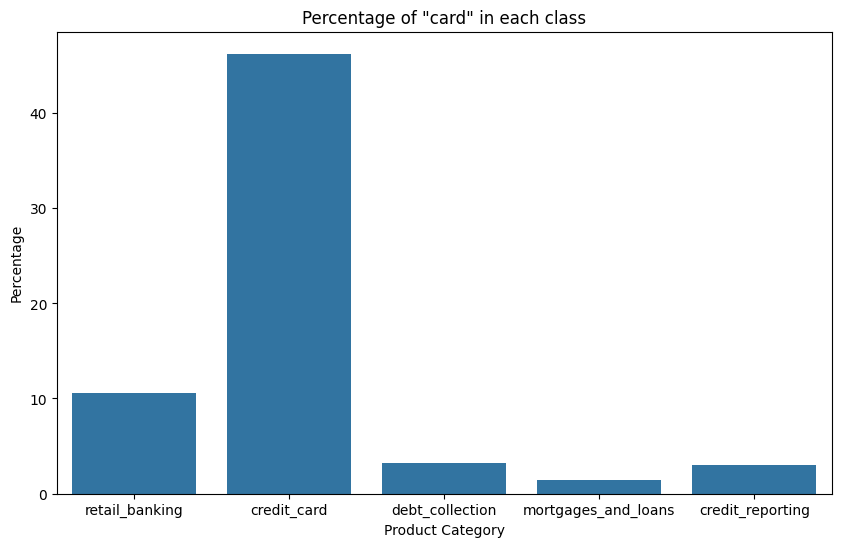

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with a 'narrative' column and a 'product' column
# Replace 'your_column_names' with the actual column names in your DataFrame

# Create a CountVectorizer
vectorizer = CountVectorizer(stop_words='english', vocabulary=['card'])

# Transform the 'narrative' column into a bag-of-words representation
X = vectorizer.fit_transform(trainData['narrative'])

# Create a DataFrame to store the word frequencies for each class
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_df['product_category'] = trainData['product_category'].reset_index(drop=True)

# Calculate the percentage of 'card' in each class
percentage_per_class = {}
total_samples = len(trainData)

for category in trainData['product_category'].unique():
    class_occurrences = word_freq_df[word_freq_df['product_category'] == category]['card'].sum()
    percentage = (class_occurrences / total_samples) * 100
    percentage_per_class[category] = percentage

# Plot the percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(percentage_per_class.keys()), y=list(percentage_per_class.values()))
plt.title('Percentage of "card" in each class')
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.show()


In [ ]:
len(df['narrative'].unique())

136869

In [ ]:
df = df.dropna(subset=['narrative'])

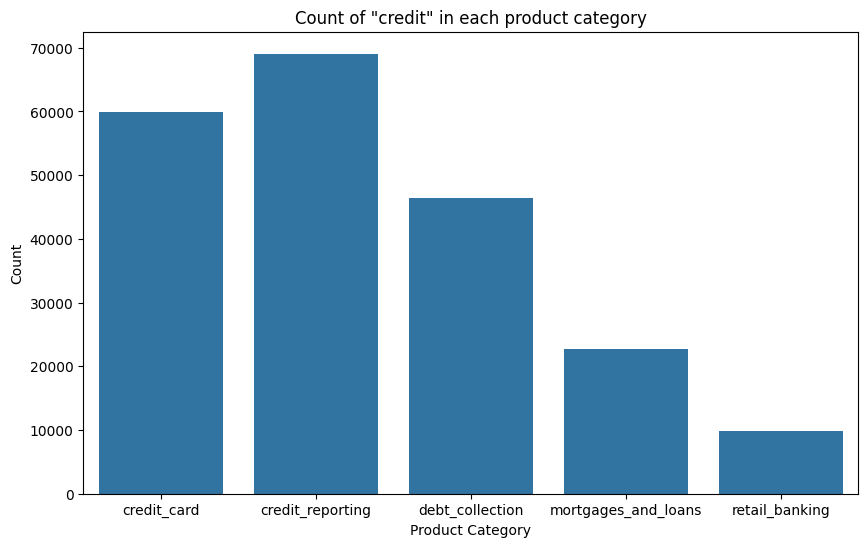

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Create a CountVectorizer
vectorizer = CountVectorizer(stop_words='english', vocabulary=['credit'])

# Transform the 'narrative' column into a bag-of-words representation
X = vectorizer.fit_transform(df['narrative'])

# Create a DataFrame to store the word frequencies for each class
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_df['product_category'] = df['product_category'].reset_index(drop=True)

# Calculate the count of 'credit' in each class
count_per_class = word_freq_df.groupby('product_category')['credit'].sum()

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=count_per_class.index, y=count_per_class.values)
plt.title('Count of "credit" in each product category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

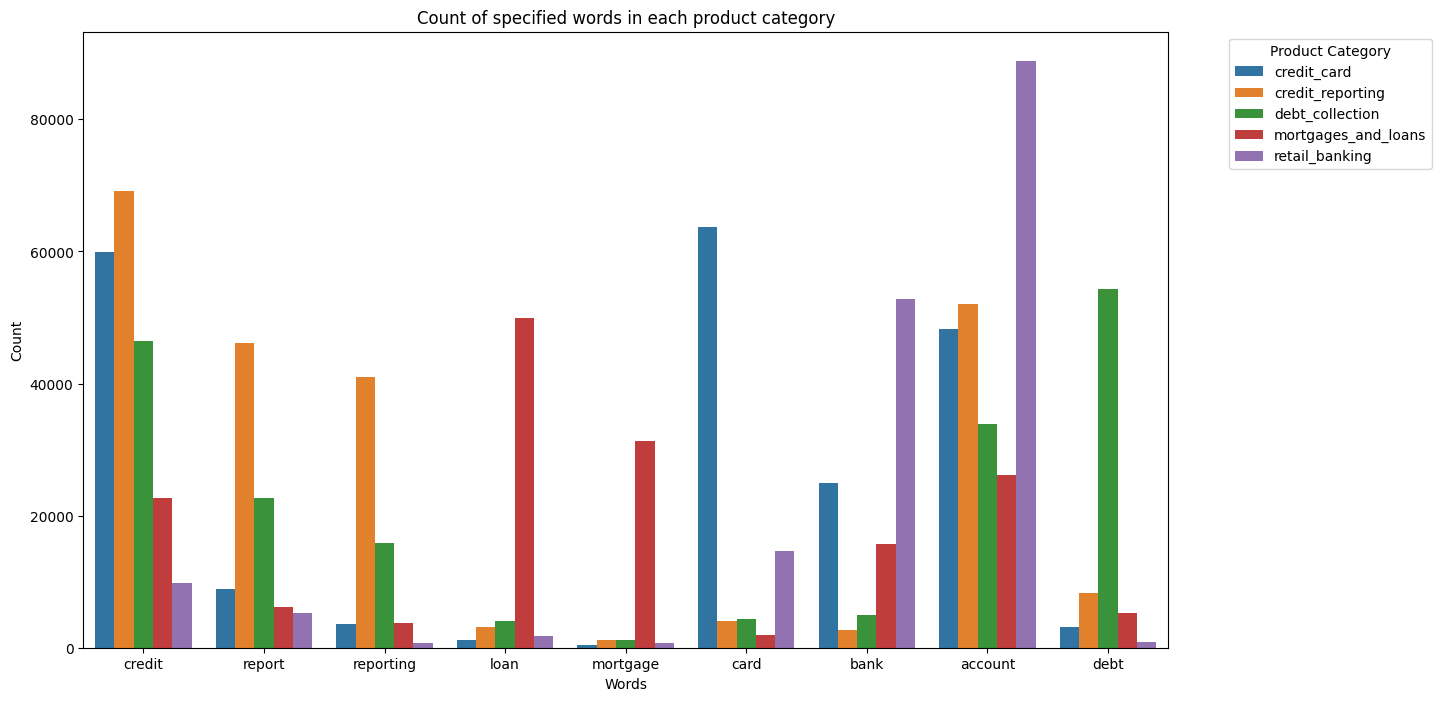

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the words you want to count
target_words = ['credit', 'report', 'reporting', 'loan', 'mortgage', 'card', 'bank', 'account', 'debt']

# Create a CountVectorizer
vectorizer = CountVectorizer(stop_words='english', vocabulary=target_words)

# Transform the 'narrative' column into a bag-of-words representation
X = vectorizer.fit_transform(df['narrative'])

# Create a DataFrame to store the word frequencies for each class
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_df['product_category'] = df['product_category'].reset_index(drop=True)

# Calculate the count of each word in each class
counts_per_class = word_freq_df.groupby('product_category')[target_words].sum()

# Plot the counts
plt.figure(figsize=(14, 8))
sns.barplot(data=counts_per_class.reset_index().melt(id_vars='product_category'), x='variable', y='value', hue='product_category')
plt.title('Count of specified words in each product category')
plt.xlabel('Words')
plt.ylabel('Count')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
